<a href="https://colab.research.google.com/github/Mozart17/Nifty-Stocks-Portfolio/blob/main/Nifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I created a portfoilio of 20 stocks based out of nifty50 stocks.Overall workflow of my project is as follows:
1. Data Collection: Although i had various options for it like nse website , webscrapping, or through apis like alpha vantage. I came across inbuilt python library by yahoo finance so i opted for it. I collected historical data for those 50 stocks for a period of 6 months (8 feb 24 to 8 august24).
After which i cleaned the missing values and made dataframe of it.Then i made a new column of daily returns in the dataframe.

2. Correlation analysis: Based on the daily returns value for each stock i made a correlation matrix out of it and a heatmap for visualtion.These was an essential step so can we can understand the relation among various stocks which further helps in process of porfolio selection.
Through correalation Analysis we can understand which are highly correlated stocks which increases the risk in the portfolio if kept together. Thus , an aim to diversefy was through selecting low and negative correlated stocks with most returns.These would help in hedging and keeping the risk little low.

3. Clustering:I opted with a top down hierarchical clustering method. I wanted to use community based clustering like louvain algorithm but i didnt understood how to infer from it results.I stuided about hierarchical clustering in my coursework and tried both top down and bottom up approach, of which i found top down to be more conclusive. (I used chatgpt for code for all these methods.)I formed 10 clusters based on the distance matrix which is 1-corr matrix values. It was visible that stocks of same sectors were together as they should be due to high correlation with a few exceptions.

4. Portfolio Selection: I calculated the overall 6 months return for each stocks and then sorted them in a descending order for each cluster and picked 2 stocks from each clusters with highest returns in them. These ensured hedging and diversification.Took a little help from gpt for the code.

Another way of which i thought was calculating expoential moving average(that places a greater weight and significance on the most recent data points) ofP/E ratios of each stocks in daily form for 6 month timeperiod , but i couldnt get a conclusive data. After which i would have found indivdual average for each stocks and then a median P/E ratiio for each clusters based on the stocks in them and then selecting 2 with lowest values in each cluster.
While researching i came across a variable used for analysis called as Beta, which is more like correalation of stocks with nifty value (Thats what i think it is) , but its formula was little tricky so i didnt go through with it.


5. Benchmark: I computed 6 months returns of indexes like nifty50,nifty500 and sensex and compared my portfolio's stocks average. Portfolio's return came to be 19% whereas indexes had around 11%,14%,11% respectively.

In [62]:
%pip install yfinance

In [63]:
import yfinance as yf

# msft = yf.Ticker("NSEI.NS")

# # get historical market data
# hist = msft.history(period="5d")



ERROR:yfinance:NSEI.NS: No data found, symbol may be delisted


These was just to understand syntax


In [64]:
# msft.capital_gains

ERROR:yfinance:$NSEI.NS: possibly delisted; No timezone found


,0


In [65]:
# msft.history_metadata

{}

In [66]:
?

<class 'pandas.core.frame.DataFrame'>


In [67]:
import pandas as pd

In [68]:
# df = pd.DataFrame(hist)

In [69]:
df
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [70]:
# open_close = df[["Open", "Close"]]

In [71]:
# open_close.head()
# changes = []
# changes.append(0)

# for index in range(len(df)):
#     if index>0:
#         # print((df.loc[df.index[index]]["Close"] - df.loc[df.index[index-1]]["Close"])/df.loc[df.index[index-1]]["Close"])
#         try:
#             changes.append((df.loc[df.index[index]]["Close"] - df.loc[df.index[index-1]]["Close"])/df.loc[df.index[index-1]]["Close"])
#         finally:
#             continue

In [72]:
changes

[0]

In [73]:
len(df)



0

In [74]:
len(changes)

1

In [75]:
backup = df.copy()

In [76]:
# backup.insert(2, "Returns", changes, True)

In [77]:
# backup[["Open", "Close", "Returns"]]

,Open,Close,Returns
Date,,,
0,NaN,NaN,0


1. Data Collection

In [78]:
nifty_50_symbols = [
    "ADANIENT", "ADANIGREEN", "ADANIPORTS", "ADANITRANS", "AMBUJACEM",
    "APOLLOHOSP", "ASIANPAINT", "AXISBANK", "BAJAJ-AUTO", "BAJAJFINSV",
    "BAJFINANCE", "BHARTIARTL", "BPCL", "BRITANNIA", "CIPLA",
    "COALINDIA", "DIVISLAB", "DRREDDY", "EICHERMOT", "GRASIM",
    "HCLTECH", "HDFC", "HDFCBANK", "HDFCLIFE", "HEROMOTOCO",
    "HINDALCO", "HINDUNILVR", "ICICIBANK", "INDUSINDBK", "INFY",
    "ITC", "JSWSTEEL", "KOTAKBANK", "LT", "M&M",
    "MARUTI", "NESTLEIND", "NTPC", "ONGC", "POWERGRID",
    "RELIANCE", "SBILIFE", "SBIN", "SUNPHARMA", "TATACONSUM",
    "TATAMOTORS", "TATASTEEL", "TCS", "TECHM", "ULTRACEMCO"
]


# yf.Ticker("ADANIPORTS.NS").history(period="1mo").to_csv(f"{stock_symbols[0]}.csv")

In [102]:
data = []
dates = pd.DataFrame(data, columns = ["NAN"])
dates.head()
# data_df = pd.DataFrame(yf.Ticker(f"ADANIENT.NS").history(period="6mo")["Date"])
cols = 1

In [103]:
for symbol in nifty_50_symbols:
    try:
        df = yf.Ticker(f"{symbol}.NS").history(period="6mo")
        changes = []
        changes.append(0)
        for index in range(len(df)):
          if index>0:
              # print((df.loc[df.index[index]]["Close"] - df.loc[df.index[index-1]]["Close"])/df.loc[df.index[index-1]]["Close"])
              changes.append(((df.loc[df.index[index]]["Close"] - df.loc[df.index[index-1]]["Close"])/df.loc[df.index[index-1]]["Close"])*100)

        df.insert(2, "Returns", changes, True)
        dates.insert(cols, f"{symbol}", df[["Returns"]], True)
        data.append({f"{symbol}":df[["Open", "Close", "Returns"]]})
        cols+=1
    except:
        continue

ERROR:yfinance:ADANITRANS.NS: No data found, symbol may be delisted
ERROR:yfinance:HDFC.NS: No data found, symbol may be delisted


2 stocks data give a error so i removed them from the list.

In [108]:
data


[{'ADANIENT':                                   Open        Close   Returns
  Date                                                         
  2024-02-08 00:00:00+05:30  3244.291713  3167.322754  0.000000
  2024-02-09 00:00:00+05:30  3183.166205  3213.903809  1.470676
  2024-02-12 00:00:00+05:30  3227.698282  3168.472168 -1.413597
  2024-02-13 00:00:00+05:30  3178.718125  3177.168701  0.274471
  2024-02-14 00:00:00+05:30  3182.716627  3205.907227  0.904533
  ...                                ...          ...       ...
  2024-08-02 00:00:00+05:30  3200.000000  3160.899902 -1.751499
  2024-08-05 00:00:00+05:30  3085.000000  3038.199951 -3.881804
  2024-08-06 00:00:00+05:30  3084.000000  3072.699951  1.135541
  2024-08-07 00:00:00+05:30  3118.000000  3185.949951  3.685684
  2024-08-08 00:00:00+05:30  3190.550049  3167.550049 -0.577533
  
  [122 rows x 3 columns]},
 {'ADANIGREEN':                                   Open        Close   Returns
  Date                                          

In [107]:
dates

,NAN,ADANIENT,ADANIGREEN,ADANIPORTS,ADANITRANS,AMBUJACEM,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,...,RELIANCE,SBILIFE,SBIN,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,ULTRACEMCO
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-08 00:00:00+05:30,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-02-09 00:00:00+05:30,NaN,1.470676,2.885746,2.112119,NaN,2.281001,3.311668,0.752651,1.496282,0.355795,...,0.732695,-1.326214,3.673790,2.930733,-0.760176,-1.006164,-1.635911,-0.009671,0.137489,-0.519129
2024-02-12 00:00:00+05:30,NaN,-1.413597,-2.025840,-1.742041,NaN,-2.204101,2.751133,0.072849,-0.447026,0.579336,...,-0.575049,-0.256998,-2.392278,-0.022811,-0.624317,-0.371590,-2.760090,-0.314487,0.591127,0.181986
2024-02-13 00:00:00+05:30,NaN,0.274471,-1.468030,1.236646,NaN,0.842948,1.579112,0.602612,2.297701,1.116861,...,0.877888,2.200557,0.784014,0.505064,1.390136,-0.515571,0.327514,0.698897,0.731718,-1.118534
2024-02-14 00:00:00+05:30,NaN,0.904533,2.021423,0.241137,NaN,0.466345,0.523898,0.161526,2.437540,2.095384,...,1.110847,-0.947128,4.197906,-1.413564,-0.193356,1.257029,2.430171,-1.190494,-2.676048,-0.655684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-02 00:00:00+05:30,NaN,-1.751499,-1.080466,-0.135209,NaN,-1.686749,0.055917,0.237142,-0.976719,-1.174655,...,-1.054253,-1.264675,-1.715649,0.959076,-1.216531,-4.172492,-2.968230,-2.593762,-2.379488,-1.835704
2024-08-05 00:00:00+05:30,NaN,-3.881804,-5.987564,-5.928843,NaN,-2.550546,-0.336055,-0.428109,-2.356030,-1.363848,...,-3.468227,-1.300938,-4.269618,-0.652560,0.481716,-7.313182,-5.309059,-2.988525,-3.405848,-2.951677
2024-08-06 00:00:00+05:30,NaN,1.135541,-1.082687,0.016735,NaN,-1.666279,-0.447095,0.269933,-0.652847,-0.607792,...,0.602843,-2.769710,-1.718723,-0.744030,-1.150579,-0.265632,0.333734,0.388693,1.857387,-0.805362


In [82]:
dates = dates.drop(['NAN', 'ADANITRANS', 'HDFC'], axis=1)

In [83]:
dates.head()

,ADANIENT,ADANIGREEN,ADANIPORTS,AMBUJACEM,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,...,RELIANCE,SBILIFE,SBIN,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,ULTRACEMCO
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-08 00:00:00+05:30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-02-09 00:00:00+05:30,1.470676,2.885746,2.112119,2.281001,3.311668,0.752651,1.496282,0.355795,0.025463,1.199120,...,0.732695,-1.326214,3.673790,2.930733,-0.760176,-1.006164,-1.635911,-0.009671,0.137489,-0.519129
2024-02-12 00:00:00+05:30,-1.413597,-2.025840,-1.742041,-2.204101,2.751133,0.072849,-0.447026,0.579336,-0.872079,-1.282586,...,-0.575049,-0.256998,-2.392278,-0.022811,-0.624317,-0.371590,-2.760090,-0.314487,0.591127,0.181986
2024-02-13 00:00:00+05:30,0.274471,-1.468030,1.236646,0.842948,1.579112,0.602612,2.297701,1.116861,0.690316,0.525182,...,0.877888,2.200557,0.784014,0.505064,1.390136,-0.515571,0.327514,0.698897,0.731718,-1.118534
2024-02-14 00:00:00+05:30,0.904533,2.021423,0.241137,0.466345,0.523898,0.161526,2.437540,2.095384,0.746174,0.648880,...,1.110847,-0.947128,4.197906,-1.413564,-0.193356,1.257029,2.430171,-1.190494,-2.676048,-0.655684


2. Correalatiion

In [84]:
cor_matrix = dates.corr()

In [85]:
cor_matrix

,ADANIENT,ADANIGREEN,ADANIPORTS,AMBUJACEM,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,...,RELIANCE,SBILIFE,SBIN,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,ULTRACEMCO
ADANIENT,1.000000,0.818883,0.898052,0.829938,0.242440,0.230117,0.493283,0.327922,0.572344,0.503266,...,0.645138,0.380996,0.701548,0.273085,0.172331,0.381882,0.607035,0.095249,0.180759,0.564309
ADANIGREEN,0.818883,1.000000,0.799575,0.746472,0.176399,0.170887,0.389046,0.288949,0.491106,0.398162,...,0.538214,0.361107,0.632629,0.287168,0.221215,0.447796,0.544794,0.124458,0.177853,0.460562
ADANIPORTS,0.898052,0.799575,1.000000,0.832723,0.217344,0.246430,0.542413,0.326090,0.593082,0.528627,...,0.628330,0.365289,0.695281,0.280677,0.175244,0.370610,0.639155,0.126712,0.191785,0.543281
AMBUJACEM,0.829938,0.746472,0.832723,1.000000,0.139005,0.232889,0.430757,0.284698,0.519922,0.520272,...,0.576831,0.392461,0.660465,0.249707,0.177128,0.365395,0.608711,0.070262,0.163448,0.574897
APOLLOHOSP,0.242440,0.176399,0.217344,0.139005,1.000000,0.227011,0.199880,0.325016,0.309079,0.268059,...,0.120931,0.213535,0.128633,0.398844,0.017697,0.202783,0.305591,0.035392,0.109741,0.224271
ASIANPAINT,0.230117,0.170887,0.246430,0.232889,0.227011,1.000000,0.141888,0.193977,0.226842,0.250229,...,0.193341,0.203746,0.040146,0.302226,0.219626,0.002825,0.276722,0.134062,0.188525,0.267480
AXISBANK,0.493283,0.389046,0.542413,0.430757,0.199880,0.141888,1.000000,0.149810,0.482152,0.415383,...,0.544982,0.130040,0.628103,0.159125,0.104431,0.210197,0.480039,0.145262,0.192960,0.414477
BAJAJ-AUTO,0.327922,0.288949,0.326090,0.284698,0.325016,0.193977,0.149810,1.000000,0.195769,0.161130,...,0.299713,0.191053,0.252664,0.236385,0.243983,0.421329,0.425022,-0.000649,0.113923,0.208240
BAJAJFINSV,0.572344,0.491106,0.593082,0.519922,0.309079,0.226842,0.482152,0.195769,1.000000,0.754114,...,0.470368,0.356053,0.555553,0.208818,0.193967,0.285333,0.570611,0.279339,0.218282,0.489957
BAJFINANCE,0.503266,0.398162,0.528627,0.520272,0.268059,0.250229,0.415383,0.161130,0.754114,1.000000,...,0.457175,0.351917,0.483817,0.232178,0.119950,0.228209,0.506520,0.183078,0.133355,0.484367


In [86]:
dates.to_csv("market_data.csv")

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

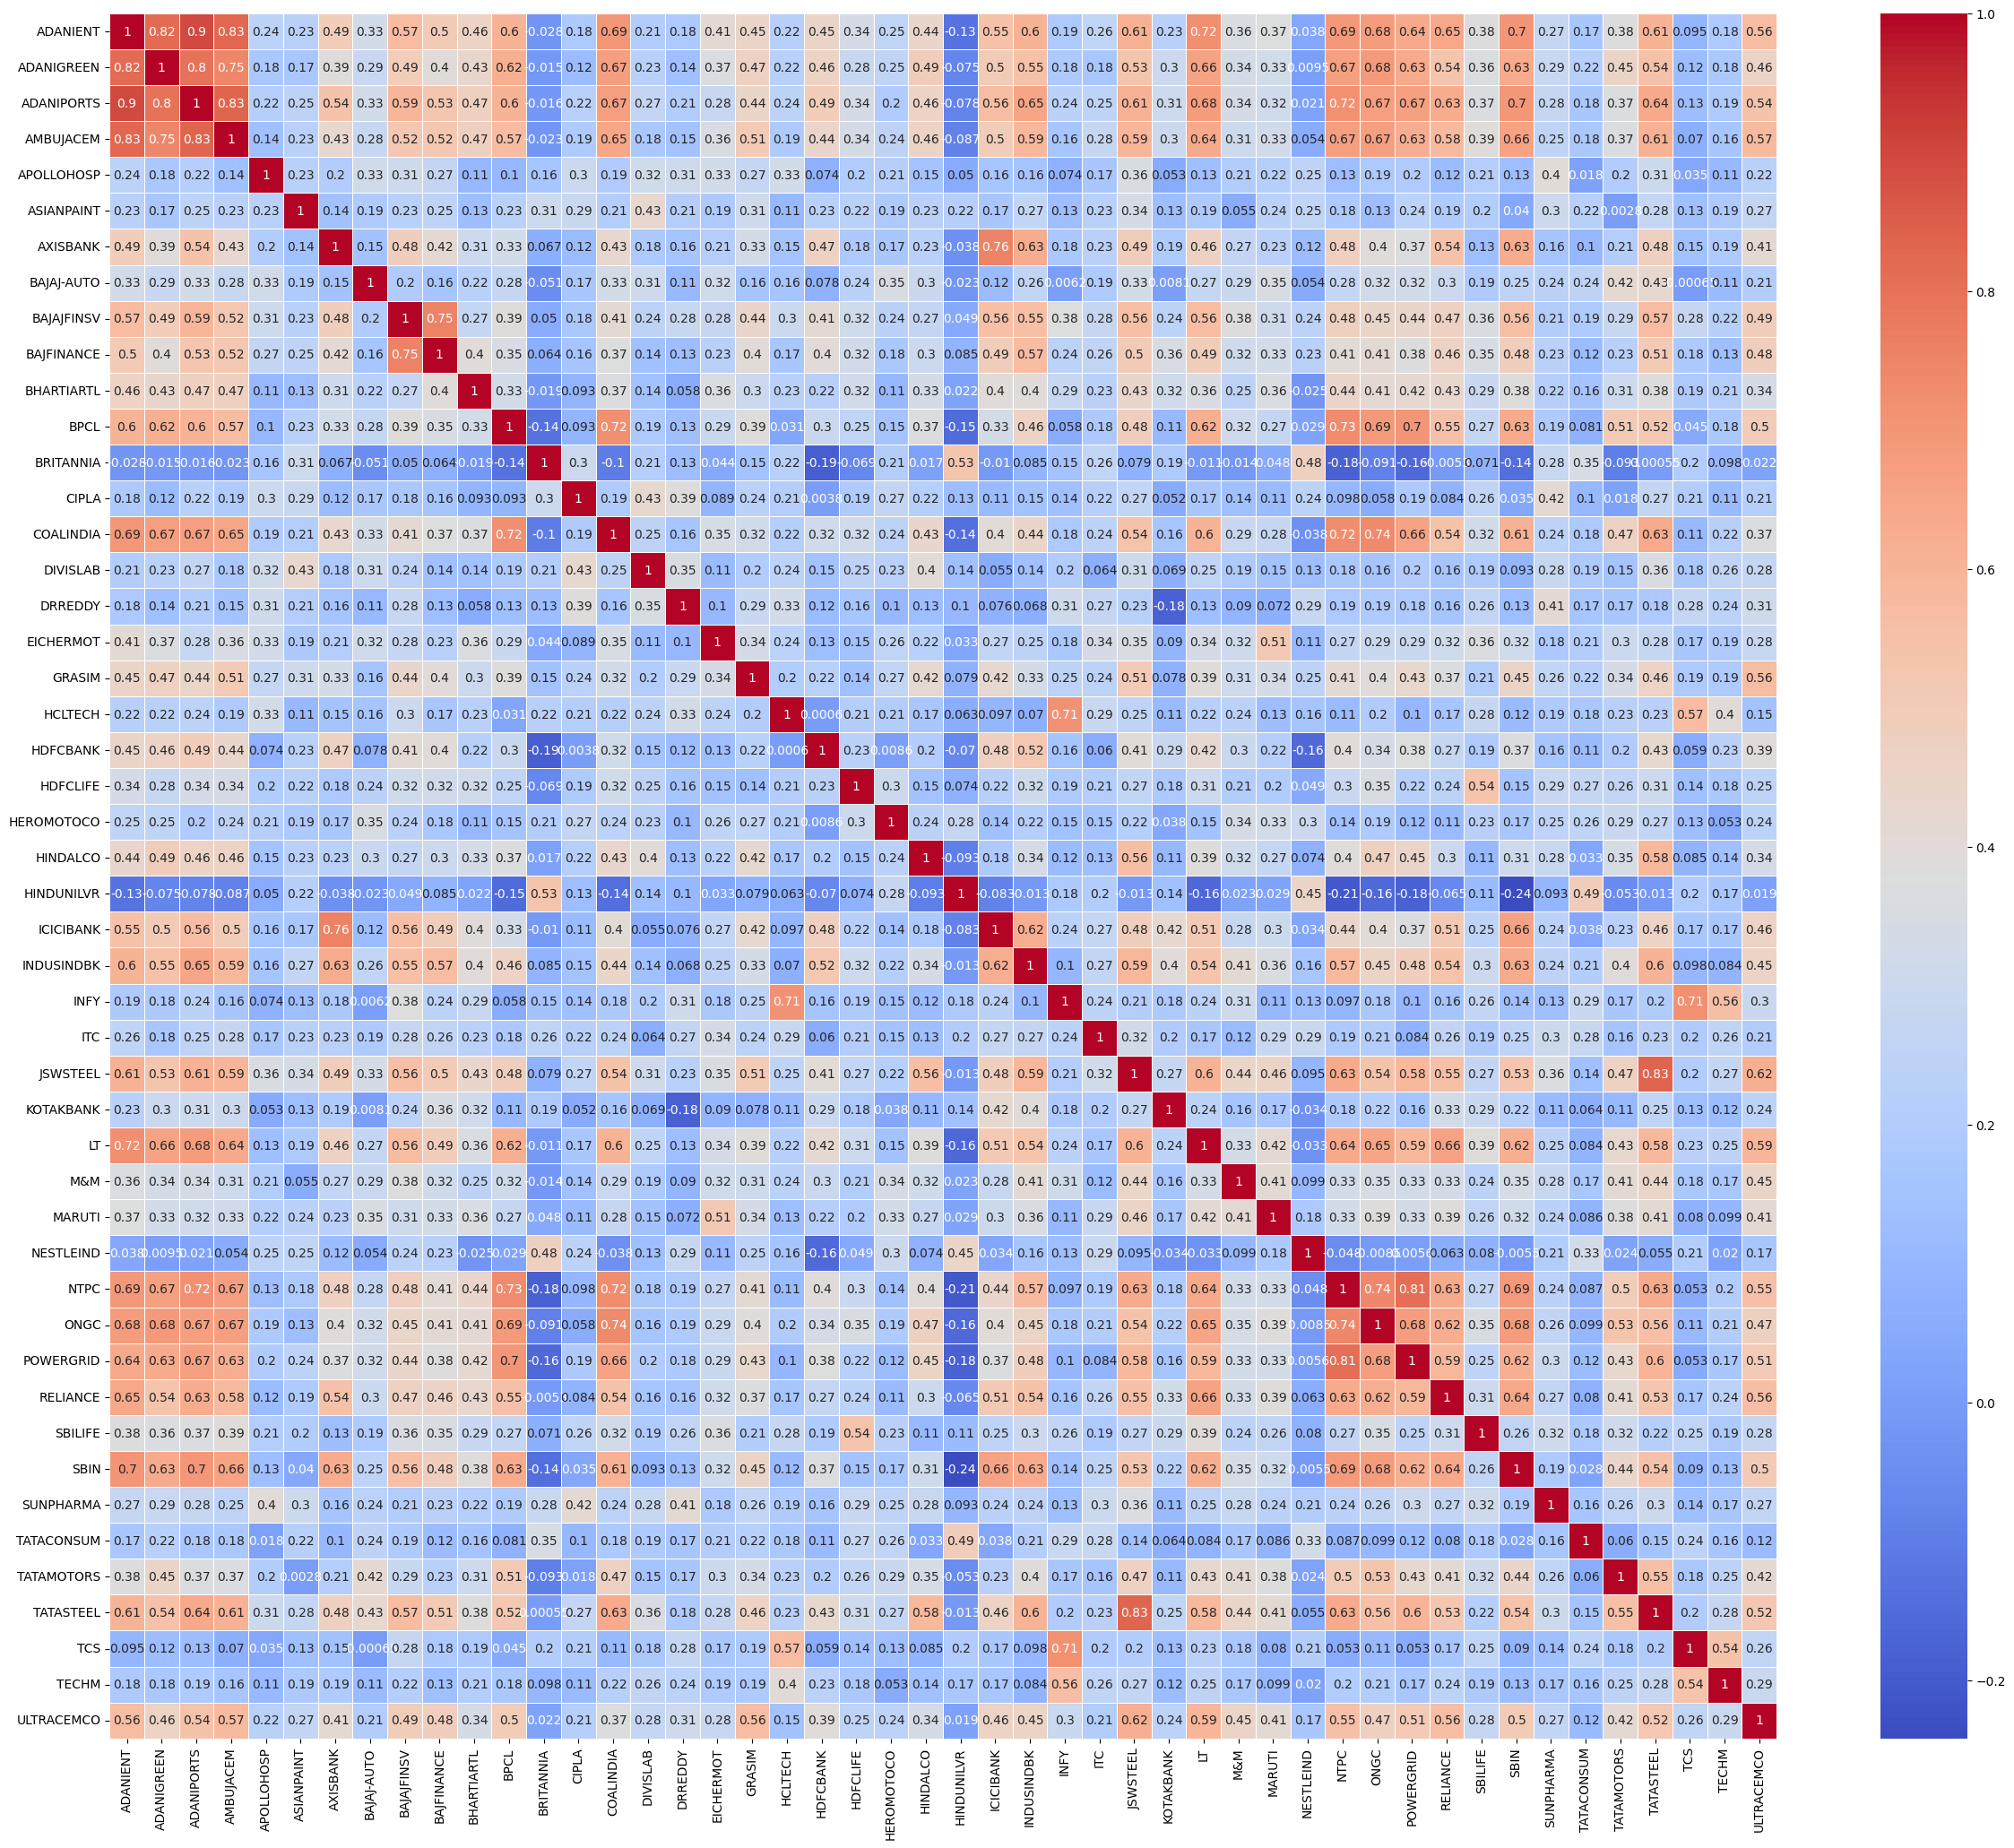

In [88]:

plt.figure(figsize=(30, 25))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


plt.show()


3.Clustering

Here i tried louvain algo, bottom up and top down clustering.

In [91]:
import networkx as nx
import numpy as np

# Assuming 'corr_matrix' is your correlation matrix as a numpy array
corr_matrix = np.array(cor_matrix)  # Make sure 'corr_matrix' is a numpy array
G = nx.from_numpy_array(corr_matrix)


In [92]:
G??

In [93]:
pip install python-louvain


In [94]:
import community as community_louvain


In [95]:
import numpy as np
import networkx as nx

# Define thresholds
high_threshold = 0.7
low_threshold = 0.4
negative_threshold = -0.2

# Initialize NetworkX graph
corr_matrix = np.array(cor_matrix)
G = nx.from_numpy_array(corr_matrix)

# Create subgraphs based on correlation thresholds
high_corr_edges = [(i, j) for i in range(corr_matrix.shape[0]) for j in range(i + 1, corr_matrix.shape[1])
                    if corr_matrix[i, j] > high_threshold]
low_corr_edges = [(i, j) for i in range(corr_matrix.shape[0]) for j in range(i + 1, corr_matrix.shape[1])
                   if low_threshold <= corr_matrix[i, j] <= high_threshold]
negative_corr_edges = [(i, j) for i in range(corr_matrix.shape[0]) for j in range(i + 1, corr_matrix.shape[1])
                       if corr_matrix[i, j] < negative_threshold]

# Create subgraphs
G_high = nx.Graph()
G_high.add_edges_from(high_corr_edges)

G_low = nx.Graph()
G_low.add_edges_from(low_corr_edges)

G_negative = nx.Graph()
G_negative.add_edges_from(negative_corr_edges)


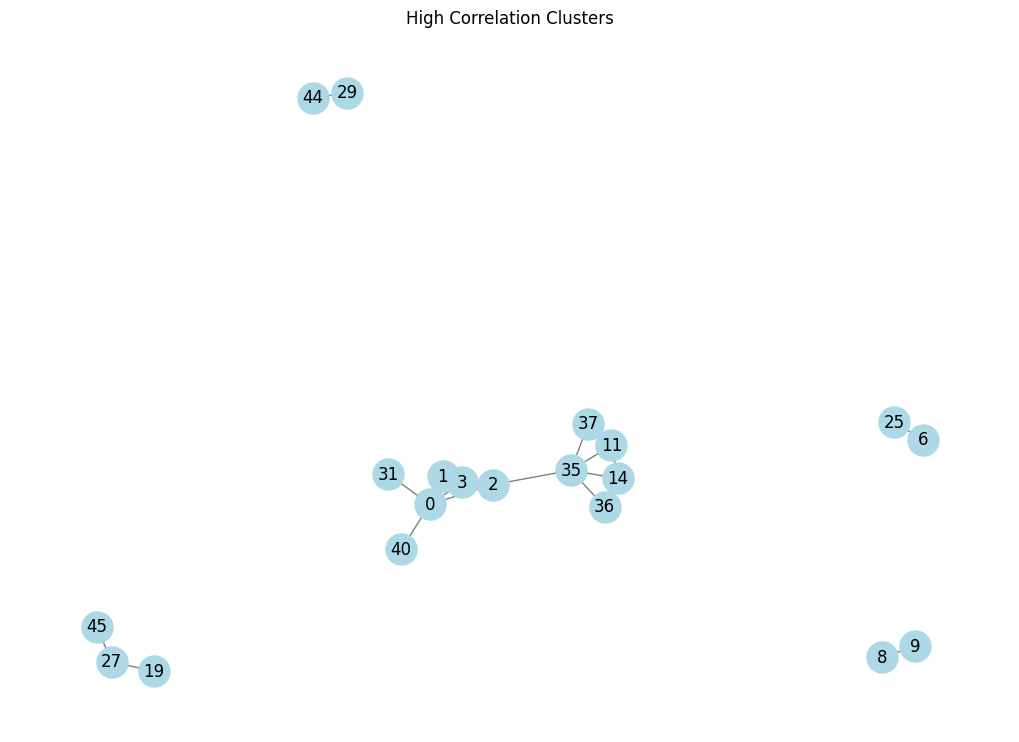

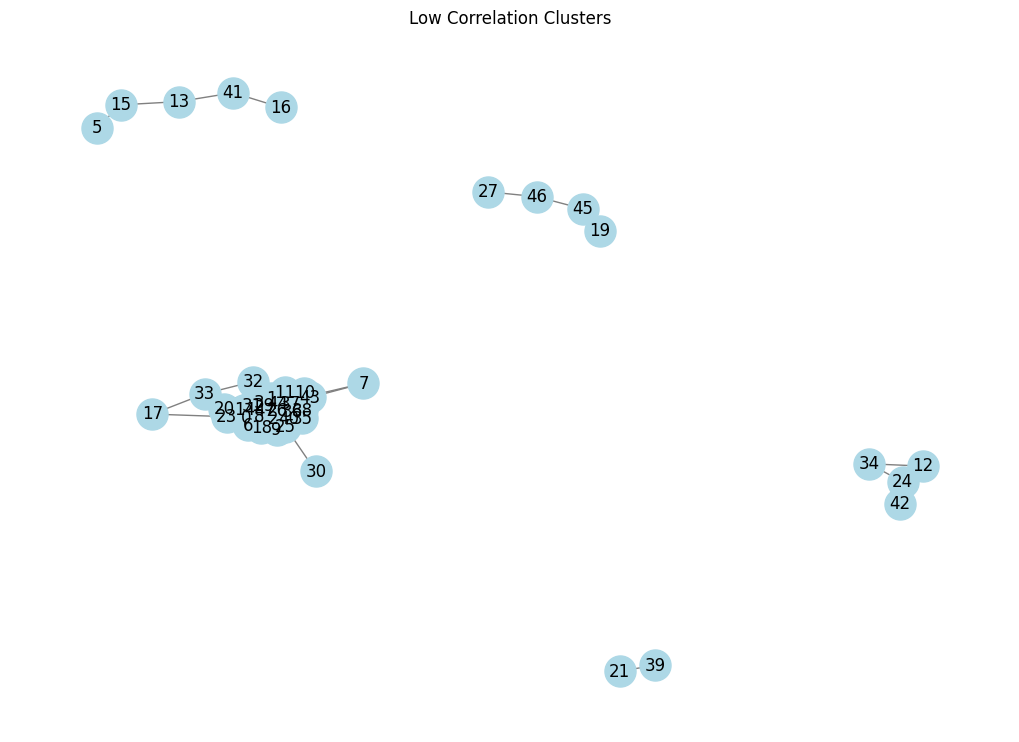

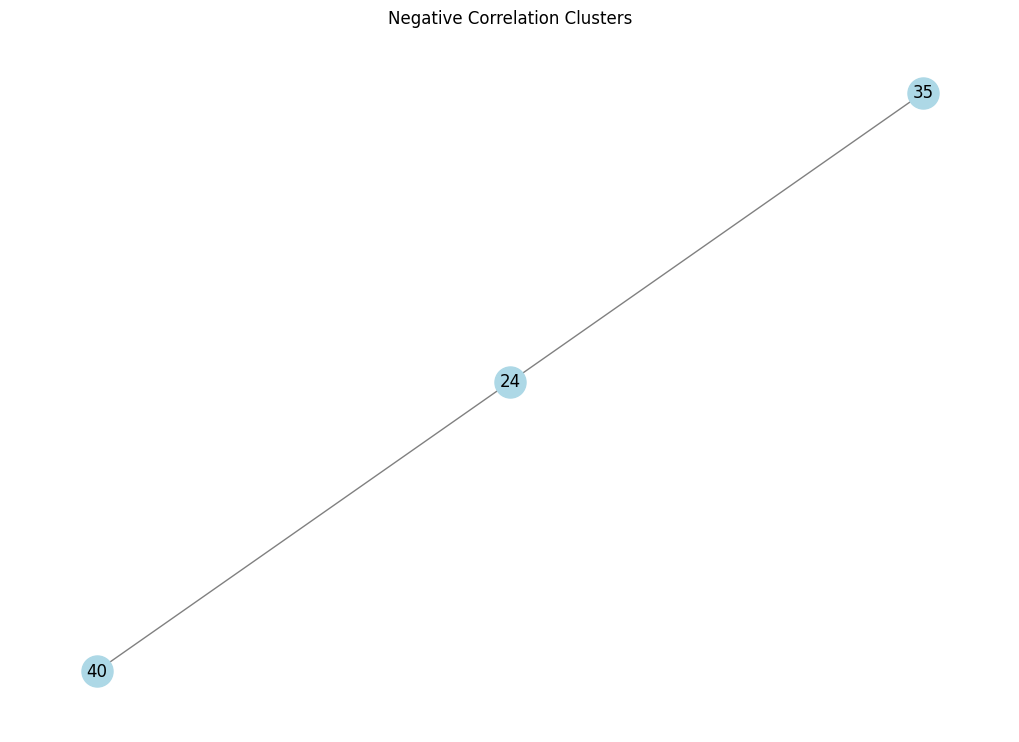

In [96]:


def plot_graph(G, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
    plt.title(title)
    plt.show()

# Plot each subgraph
plot_graph(G_high, 'High Correlation Clusters')
plot_graph(G_low, 'Low Correlation Clusters')
plot_graph(G_negative, 'Negative Correlation Clusters')


please ignore the graph, as i couldnt get hang to how to make sense for portfolio selection.

<ipython-input-97-ab65cfc3e43a>:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(dist_matrix, method='ward')


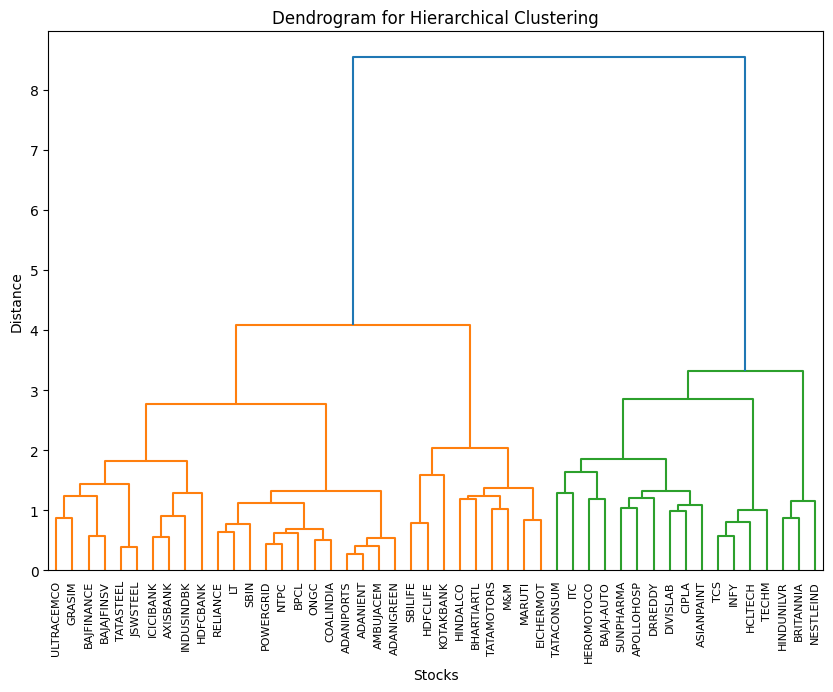

         Stock  Cluster
0     ADANIENT       14
1   ADANIGREEN       14
2   ADANIPORTS       14
3    AMBUJACEM       14
4   APOLLOHOSP        4
5   ASIANPAINT        3
6     AXISBANK       16
7   BAJAJ-AUTO        6
8   BAJAJFINSV       19
9   BAJFINANCE       19
10  BHARTIARTL       11
11        BPCL       15
12   BRITANNIA        1
13       CIPLA        3
14   COALINDIA       15
15    DIVISLAB        3
16     DRREDDY        5
17   EICHERMOT        9
18      GRASIM       20
19     HCLTECH        2
20    HDFCBANK       17
21    HDFCLIFE       12
22  HEROMOTOCO        6
23    HINDALCO       11
24  HINDUNILVR        1
25   ICICIBANK       16
26  INDUSINDBK       16
27        INFY        2
28         ITC        7
29    JSWSTEEL       18
30   KOTAKBANK       13
31          LT       15
32         M&M       10
33      MARUTI        9
34   NESTLEIND        1
35        NTPC       15
36        ONGC       15
37   POWERGRID       15
38    RELIANCE       15
39     SBILIFE       12
40        SBIN  

In [97]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cor_matrix is your correlation matrix DataFrame
# First, convert it to a distance matrix
# The distance matrix is 1 - correlation, because we need a distance measure
dist_matrix = 1 - cor_matrix

# Perform hierarchical clustering
linkage_matrix = sch.linkage(dist_matrix, method='ward')


# To create clusters, we can cut the dendrogram at a certain height
# Adjust the height to get the desired number of clusters
num_clusters = 20 # Example: number of clusters
cluster_labels = sch.fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Create a dendrogram to visualize clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix, labels=cor_matrix.columns, orientation='top', distance_sort='descending')
plt.xticks(rotation=90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Stocks')
plt.ylabel('Distance')
plt.show()


# Add cluster labels to your DataFrame
cluster_df = pd.DataFrame({'Stock': cor_matrix.columns, 'Cluster': cluster_labels})

print(cluster_df)




Top Down Clustering:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Cluster 1: ['HCLTECH', 'INFY', 'TCS', 'TECHM']
Cluster 2: ['BRITANNIA', 'HINDUNILVR', 'ITC', 'KOTAKBANK', 'NESTLEIND', 'TATACONSUM']
Cluster 3: ['INDUSINDBK', 'JSWSTEEL', 'TATASTEEL']
Cluster 4: ['AXISBANK', 'BAJAJFINSV', 'BAJFINANCE', 'HDFCBANK', 'ICICIBANK']
Cluster 5: ['BHARTIARTL', 'GRASIM', 'HINDALCO', 'M&M', 'MARUTI', 'TATAMOTORS', 'ULTRACEMCO']
Cluster 6: ['ADANIENT', 'ADANIGREEN', 'ADANIPORTS', 'AMBUJACEM']
Cluster 7: ['APOLLOHOSP', 'ASIANPAINT', 'CIPLA', 'DIVISLAB', 'DRREDDY', 'SUNPHARMA']
Cluster 8: ['BAJAJ-AUTO', 'EICHERMOT', 'HDFCLIFE', 'HEROMOTOCO', 'SBILIFE']
Cluster 9: ['LT', 'RELIANCE', 'SBIN']
Cluster 10: ['BPCL', 'COALINDIA', 'NTPC', 'ONGC', 'POWERGRID']


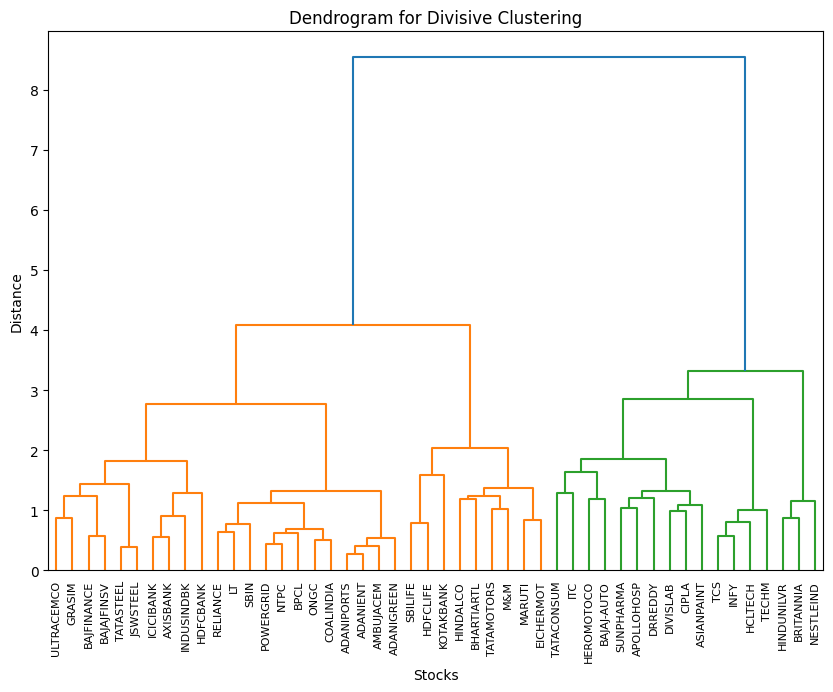

In [98]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

# Assuming cor_matrix is your DataFrame
dist_matrix = 1 - cor_matrix

def divisive_clustering(distance_matrix, num_clusters):
    clusters = [list(range(len(distance_matrix)))]

    while len(clusters) < num_clusters:
        largest_cluster = max(clusters, key=len)
        clusters.remove(largest_cluster)

        sub_matrix = distance_matrix[np.ix_(largest_cluster, largest_cluster)]

        kmeans = KMeans(n_clusters=2).fit(sub_matrix)
        labels = kmeans.labels_

        cluster1 = [largest_cluster[i] for i in range(len(largest_cluster)) if labels[i] == 0]
        cluster2 = [largest_cluster[i] for i in range(len(largest_cluster)) if labels[i] == 1]

        clusters.append(cluster1)
        clusters.append(cluster2)

    return clusters

num_clusters = 10
clusters = divisive_clustering(dist_matrix.values, num_clusters)

# Convert clusters back to stock names
stock_names = cor_matrix.columns
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {[stock_names[idx] for idx in cluster]}")

# Optionally visualize with a dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(dist_matrix, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=cor_matrix.columns, orientation='top', distance_sort='descending')
plt.title('Dendrogram for Divisive Clustering')
plt.xlabel('Stocks')
plt.ylabel('Distance')
plt.show()


4.Selection

In [100]:
hist = yf.Ticker("^NSEI").history(period="6mo")

In [101]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-08 00:00:00+05:30,22009.650391,22011.050781,21665.300781,21717.949219,491100,0.0,0.0
2024-02-09 00:00:00+05:30,21727.000000,21804.449219,21629.900391,21782.500000,349200,0.0,0.0
2024-02-12 00:00:00+05:30,21800.800781,21831.699219,21574.750000,21616.050781,287400,0.0,0.0
2024-02-13 00:00:00+05:30,21664.300781,21766.800781,21543.349609,21743.250000,365800,0.0,0.0
2024-02-14 00:00:00+05:30,21578.150391,21870.849609,21530.199219,21840.050781,359100,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-02 00:00:00+05:30,24789.000000,24851.900391,24686.849609,24717.699219,345000,0.0,0.0
2024-08-05 00:00:00+05:30,24302.849609,24350.050781,23893.699219,24055.599609,487000,0.0,0.0
2024-08-06 00:00:00+05:30,24189.849609,24382.599609,23960.400391,23992.550781,312300,0.0,0.0


In [176]:
index = 0
returns_6mo = []
for index in range(48):
    keys = data[index].keys()
    print(list(keys)[0])
    symbol = list(keys)[0]
    try:
        print(data[index])

        first_close = data[index][symbol]["Close"][0]
        last_close = data[index][symbol]["Close"][-1]
        returns_6mo.append({symbol: (((last_close - first_close)/first_close)*100)})
        # index+=1
    finally:
        continue
      #break

ADANIENT
{'ADANIENT':                                   Open        Close   Returns
Date                                                         
2024-02-08 00:00:00+05:30  3244.291713  3167.322754  0.000000
2024-02-09 00:00:00+05:30  3183.166205  3213.903809  1.470676
2024-02-12 00:00:00+05:30  3227.698282  3168.472168 -1.413597
2024-02-13 00:00:00+05:30  3178.718125  3177.168701  0.274471
2024-02-14 00:00:00+05:30  3182.716627  3205.907227  0.904533
...                                ...          ...       ...
2024-08-02 00:00:00+05:30  3200.000000  3160.899902 -1.751499
2024-08-05 00:00:00+05:30  3085.000000  3038.199951 -3.881804
2024-08-06 00:00:00+05:30  3084.000000  3072.699951  1.135541
2024-08-07 00:00:00+05:30  3118.000000  3185.949951  3.685684
2024-08-08 00:00:00+05:30  3190.550049  3167.550049 -0.577533

[122 rows x 3 columns]}
ADANIGREEN
{'ADANIGREEN':                                   Open        Close   Returns
Date                                                       

<ipython-input-176-b91eacda3ac0>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_close = data[index][symbol]["Close"][0]
<ipython-input-176-b91eacda3ac0>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_close = data[index][symbol]["Close"][-1]
<ipython-input-176-b91eacda3ac0>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_close = data[index][symbol]["Close"][0]
<ipython-input-176-b91eacda3ac0>:11: FutureWarnin


{'ICICIBANK':                                   Open        Close   Returns
Date                                                         
2024-02-08 00:00:00+05:30  1024.099976   989.299988  0.000000
2024-02-09 00:00:00+05:30   988.849976  1010.700012  2.163148
2024-02-12 00:00:00+05:30  1010.400024   996.099976 -1.444547
2024-02-13 00:00:00+05:30  1006.000000  1019.799988  2.379280
2024-02-14 00:00:00+05:30  1009.549988  1022.700012  0.284372
...                                ...          ...       ...
2024-08-02 00:00:00+05:30  1197.000000  1196.550049 -1.119736
2024-08-05 00:00:00+05:30  1182.000000  1172.599976 -2.001594
2024-08-06 00:00:00+05:30  1175.000000  1166.849976 -0.490363
2024-08-07 00:00:00+05:30  1178.949951  1172.449951  0.479923
2024-08-08 00:00:00+05:30  1166.949951  1164.599976 -0.669536

[122 rows x 3 columns]}
INDUSINDBK
{'INDUSINDBK':                                   Open        Close   Returns
Date                                                         
2024

<ipython-input-176-b91eacda3ac0>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_close = data[index][symbol]["Close"][-1]
<ipython-input-176-b91eacda3ac0>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_close = data[index][symbol]["Close"][0]
<ipython-input-176-b91eacda3ac0>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_close = data[index][symbol]["Close"][-1]
<ipython-input-176-b91eacda3ac0>:10: FutureWarnin

In [177]:
returns_6mo

[{'ADANIENT': 0.007176247560962262},
 {'ADANIGREEN': -2.7243594238390614},
 {'ADANIPORTS': 22.511831380200192},
 {'AMBUJACEM': 13.68200417598243},
 {'APOLLOHOSP': 5.084274494538529},
 {'ASIANPAINT': 3.5799617860077015},
 {'AXISBANK': 9.955435129863629},
 {'BAJAJ-AUTO': 25.2977198984794},
 {'BAJAJFINSV': -1.8801300436760968},
 {'BAJFINANCE': 0.602127083345305},
 {'BHARTIARTL': 27.819518003920624},
 {'BPCL': 9.04109195583199},
 {'BRITANNIA': 19.359309165249798},
 {'CIPLA': 11.48159834125893},
 {'COALINDIA': 15.30485445899875},
 {'DIVISLAB': 32.02075144863987},
 {'DRREDDY': 13.30081838604175},
 {'EICHERMOT': 21.54575855012699},
 {'GRASIM': 24.164116666227883},
 {'HCLTECH': -2.627712788266836},
 {'HDFCBANK': 18.679422464941194},
 {'HDFCLIFE': 20.46065871791252},
 {'HEROMOTOCO': 8.670819819028484},
 {'HINDALCO': 2.1204058305070017},
 {'HINDUNILVR': 14.181689968895572},
 {'ICICIBANK': 17.719598701708854},
 {'INDUSINDBK': -7.787353217597588},
 {'INFY': 3.5975631741649394},
 {'ITC': 21.4631013

In [164]:
# (data[5]["APOLLOHOSP"]["Close"][-1]- data[5]["APOLLOHOSP"]["Open"][0]) / data[5]["APOLLOHOSP"]["Open"][0]
# # data[5].keys()

# # data[5]["APOLLOHOSP"]                     For CHECKING

<ipython-input-164-24f636e3f194>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (data[5]["APOLLOHOSP"]["Close"][-1]- data[5]["APOLLOHOSP"]["Open"][0]) / data[5]["APOLLOHOSP"]["Open"][0]


0.05584151314273903

In [180]:
import pandas as pd

# Convert the returns list to a DataFrame
returns_6mo_df = pd.DataFrame(returns_6mo)

# Ensure the DataFrame is in the correct shape
returns_6mo_df = returns_6mo_df.melt(var_name='Stock', value_name='Return')
returns_6mo_df = returns_6mo_df.dropna()  # Drop any NaN values that might have been introduced

# Set 'Stock' as the index
returns_6mo_df.set_index('Stock', inplace=True)

# Initialize a list to hold the top stocks from each cluster
top_stocks = []





In [181]:
returns_6mo_df


,Return
Stock,
ADANIENT,0.007176
ADANIGREEN,-2.724359
ADANIPORTS,22.511831
AMBUJACEM,13.682004
APOLLOHOSP,5.084274
ASIANPAINT,3.579962
AXISBANK,9.955435
BAJAJ-AUTO,25.297720
BAJAJFINSV,-1.880130


In [182]:
top_stocks


[]

In [183]:
for i, cluster in enumerate(clusters):
    cluster_stocks = [stock_names[idx] for idx in cluster]
    cluster_returns = returns_6mo_df.loc[cluster_stocks]
    sorted_stocks = cluster_returns.sort_values(by='Return', ascending=False)
    top_2_stocks = sorted_stocks.head(2)
    top_stocks.append(top_2_stocks)

KeyError: "['TECHM'] not in index"

In [186]:
if top_stocks:
    final_portfolio = pd.concat(top_stocks)
    print("Selected Top 2 Stocks from Each Cluster:")
    print(final_portfolio)


else:
    print("No stocks were selected from the clusters.")

Selected Top 2 Stocks from Each Cluster:
               Return
Stock                
INFY         3.597563
TCS          1.899764
ITC         21.463101
BRITANNIA   19.359309
JSWSTEEL     8.807031
TATASTEEL    6.723155
HDFCBANK    18.679422
ICICIBANK   17.719599
M&M         60.305748
BHARTIARTL  27.819518
ADANIPORTS  22.511831
AMBUJACEM   13.682004
DIVISLAB    32.020751
SUNPHARMA   16.863957
BAJAJ-AUTO  25.297720
EICHERMOT   21.545759
SBIN        17.447032
LT           7.374726
POWERGRID   26.132818
NTPC        24.181950


In [187]:

# Define the period for the past 6 months
start_date = "2024-02-08"
end_date = "2024-08-08"

# Fetch historical data for NIFTY 50, NIFTY 500, and SENSEX
nifty50 = yf.download("^NSEI", start=start_date, end=end_date)
nifty500 = yf.download("^CRSLDX", start=start_date, end=end_date)  # NIFTY 500 index might have different ticker
sensex = yf.download("^BSESN", start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [188]:
# Calculate 6-month returns for each index
nifty50_return = ((nifty50['Close'][-1] - nifty50['Close'][0]) / nifty50['Close'][0]) * 100
nifty500_return = ((nifty500['Close'][-1] - nifty500['Close'][0]) / nifty500['Close'][0]) * 100
sensex_return = ((sensex['Close'][-1] - sensex['Close'][0]) / sensex['Close'][0]) * 100

print(f"NIFTY 50 6-Month Return: {nifty50_return:.2f}%")
print(f"NIFTY 500 6-Month Return: {nifty500_return:.2f}%")
print(f"SENSEX 6-Month Return: {sensex_return:.2f}%")


NIFTY 50 6-Month Return: 11.88%
NIFTY 500 6-Month Return: 14.32%
SENSEX 6-Month Return: 11.26%


<ipython-input-188-5e511b852c0c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nifty50_return = ((nifty50['Close'][-1] - nifty50['Close'][0]) / nifty50['Close'][0]) * 100
<ipython-input-188-5e511b852c0c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nifty500_return = ((nifty500['Close'][-1] - nifty500['Close'][0]) / nifty500['Close'][0]) * 100
<ipython-input-188-5e511b852c0c>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se

In [189]:
# Calculate the average return of your portfolio
portfolio_avg_return = final_portfolio['Return'].mean()

print(f"Portfolio Average 6-Month Return: {portfolio_avg_return:.2f}%")


Portfolio Average 6-Month Return: 19.67%


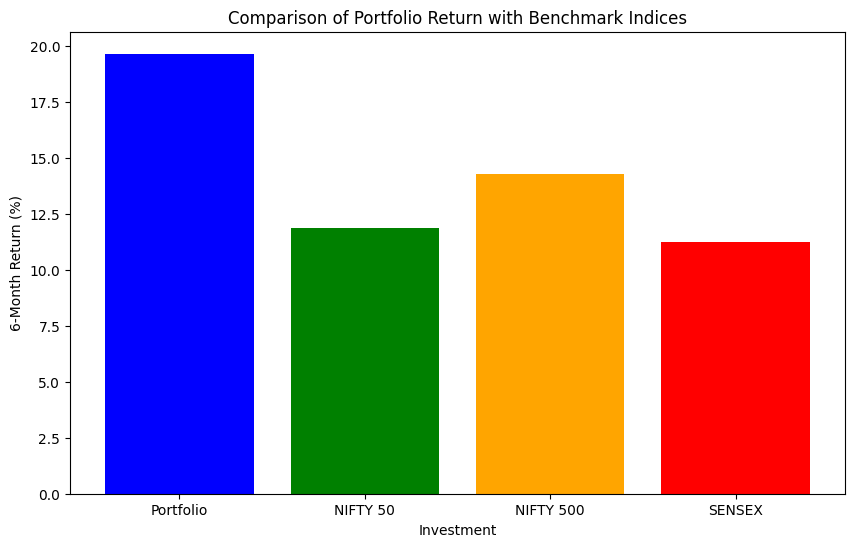

In [190]:
import matplotlib.pyplot as plt

# Data for visualization
labels = ['Portfolio', 'NIFTY 50', 'NIFTY 500', 'SENSEX']
returns = [portfolio_avg_return, nifty50_return, nifty500_return, sensex_return]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, returns, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Investment')
plt.ylabel('6-Month Return (%)')
plt.title('Comparison of Portfolio Return with Benchmark Indices')
plt.show()


THANK YOU for such an interesting project.